In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import ml_metrics as metrics

In [3]:
df = pd.read_csv('orders_20190822.csv', sep=";",index_col ="o_date", parse_dates=['o_date'],  decimal=',')  

In [4]:
df.head()

,id_o,user_id,price
o_date,,,
2016-01-01,1234491,337544,539.0
2016-01-01,1234494,171642,153.3
2016-01-01,1234497,260596,55.3
2016-01-01,1234498,1105609,752.5
2016-01-01,1234500,982696,4410.0


In [6]:
df1 = df[['price']]

In [13]:
weekly_resampled_data = df1.price.resample('D').mean() 

In [14]:
weekly_resampled_data.head()

o_date
2016-01-01    1846.431419
2016-01-02    2179.590305
2016-01-03    2043.522002
2016-01-04    2319.170931
2016-01-05    2023.681055
Freq: D, Name: price, dtype: float64

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

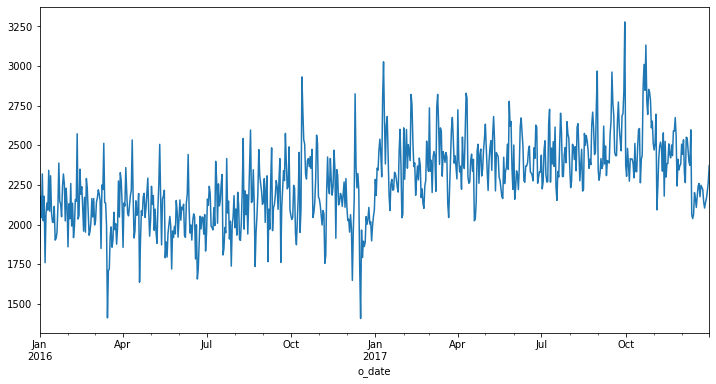

In [16]:
weekly_resampled_data.plot(figsize=(12,6))

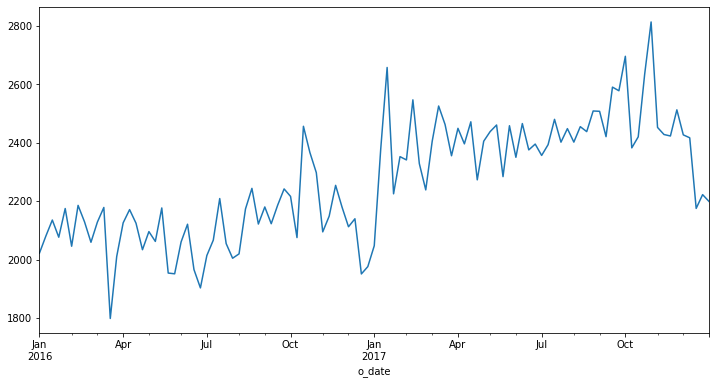

In [18]:
otg = weekly_resampled_data.resample('W').mean()
otg.plot(figsize=(12,6))

count     105.000000
mean     2266.947475
std       198.452633
min      1799.709362
25%      2121.944345
50%      2242.740270
75%      2423.725840
max      2813.663635
Name: price, dtype: float64

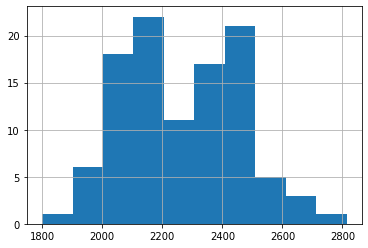

In [20]:
itog = otg.describe()
otg.hist()
itog

In [22]:
print('V = %f' % (itog['std']/itog['mean']))

V = 0.087542


In [25]:
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(otg)
a = np.vstack([jb_test])
itog = SimpleTable(a, row)
print(itog)

        JB               p-value               skew             kurtosis    
----------------------------------------------------------------------------
1.8529691065035687 0.39594318380869337 0.14856880807986897 2.420996517423986
----------------------------------------------------------------------------


In [27]:
src_data_model = otg

In [28]:
model = sm.tsa.ARIMA(src_data_model, order=(1,1,1), freq='W').fit(full_output=False, disp=0)

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.price   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -645.944
Method:                       css-mle   S.D. of innovations            120.015
Date:                Tue, 25 Feb 2020   AIC                           1299.887
Time:                        19:46:28   BIC                           1310.465
Sample:                    01-10-2016   HQIC                          1304.172
                         - 12-31-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.3415      2.795      1.195      0.232      -2.138       8.821
ar.L1.D.price     0.3469      0.184      1.888      0.059      -0.013       0.707
ma.L1.D.price    -0.8851      0.141     -6.282      0.000      -1.161      -0.609
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.8826           +0.0000j            2.8826            0.0000
MA.1            1.1298           +0.0000j            1.1298            0.0000
-----------------------------------------------------------------------------
"""

In [30]:
pred = model.predict('2018-01-01','2018-12-31', typ='levels')

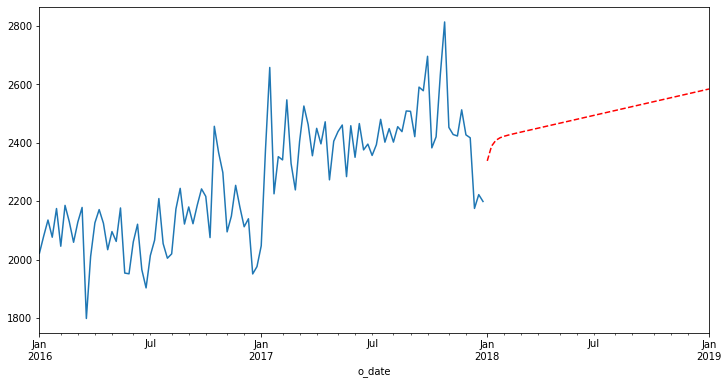

In [31]:
otg.plot(figsize=(12,6))
pred.plot(style='r--')